# Data Preparation

In [1]:
# download the data
!wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Input.zip


--2019-06-03 09:42:06--  https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Input.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.128.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.128.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

ISIC_2019_Training_ 100%[===================>]   9.10G  35.9MB/s    in 5m 1s   

2019-06-03 09:47:07 (31.0 MB/s) - ‘ISIC_2019_Training_Input.zip’ saved [9771618190/9771618190]



In [2]:
#Extract the data
#!unzip ISIC_2019_Training_Input.zip

import zipfile
import time
start = time.time()
with zipfile.ZipFile("ISIC_2019_Training_Input.zip","r") as zip_ref:
    zip_ref.extractall()

end = time.time()
elapsed = end - start
print(elapsed)  

147.8305971622467


In [0]:
#delete non images files
!rm ISIC_2019_Training_Input/ATTRIBUTION.txt
!rm ISIC_2019_Training_Input/LICENSE.txt

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


# Read in the data
ground_truth = pd.read_csv('https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_GroundTruth.csv')

# Display some information in the dataset
ground_truth.head()


Using TensorFlow backend.


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Set y as the labels
y = []
for row in ground_truth.iterrows():
    innerlist = []
    newlist = row[1].index[row[1].values[1:].argmax() + 1]
    y.append(newlist)


In [6]:
print(y)

['NV', 'NV', 'MEL', 'NV', 'MEL', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'MEL', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'MEL', 'NV', 'NV', 'NV', 'MEL', 'NV', 'NV', 'MEL', 'MEL', 'MEL', 'NV', 'NV', 'MEL', 'MEL', 'NV', 'NV', 'NV', 'MEL', 'NV', 'NV', 'MEL', 'NV', 'NV', 'MEL', 'NV', 'NV', 'MEL', 'NV', 'NV', 'NV', 'NV', 'MEL', 'NV', 'MEL', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'MEL', 'NV', 'MEL', 'MEL', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'NV', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL', 'MEL'

In [0]:
#add a name to the label series
yd = pd.Series(y) 
yd.name = 'cclass'

In [8]:
print(yd)

0         NV
1         NV
2        MEL
3         NV
4        MEL
5         NV
6         NV
7         NV
8         NV
9         NV
10        NV
11        NV
12       MEL
13        NV
14        NV
15        NV
16        NV
17        NV
18        NV
19        NV
20        NV
21       MEL
22        NV
23        NV
24        NV
25       MEL
26        NV
27        NV
28       MEL
29       MEL
        ... 
25301    MEL
25302     NV
25303     AK
25304    BCC
25305    MEL
25306     NV
25307     NV
25308    BCC
25309     NV
25310    SCC
25311     AK
25312    BCC
25313    MEL
25314    BKL
25315    BCC
25316    MEL
25317     NV
25318    BKL
25319    MEL
25320    MEL
25321     NV
25322    MEL
25323     NV
25324     NV
25325    BCC
25326    BCC
25327    BKL
25328    MEL
25329     NV
25330    BKL
Name: cclass, Length: 25331, dtype: object


In [0]:
# Split the metadata into training and validation
df_train, df_val = train_test_split(ground_truth, test_size=0.2, random_state=101, stratify=yd)

In [0]:
# Get a list of images in each of the two folders
folder = os.listdir('ISIC_2019_Training_Input')

# Get a list of train and val images
#all_list = list(ground_truth['image'])
#
train_list = list(df_train['image'])
val_list = list(df_val['image'])

# create a work directory

In [0]:
#create a work directory
base_dir = 'base_dir'
os.mkdir(base_dir)

# Training files directory
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation files directory
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


In [0]:
#create sub directory for the classes
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        dir_path = os.path.join(train_dir, col)
        os.mkdir(dir_path)
        dir_path = os.path.join(val_dir, col)
        os.mkdir(dir_path)

In [13]:
#check the directories
!ls ./base_dir/train_dir/

AK  BCC  BKL  DF  MEL  NV  SCC	VASC


# Transfer the images into the folders


In [0]:
# Transfer the training images
for row in df_train.iterrows():
    image = row[1].image
    # The argmax error was occuring because the first column (image) is a string.
    # By using row[1].values[1:] we skip the first column.  This means we need 
    # add 1 to get the correct row[1].index.
    label = row[1].index[row[1].values[1:].argmax() + 1]
    fname = image + '.jpg'

    if fname in folder:
        # source path to image
        src = os.path.join('ISIC_2019_Training_Input', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        


In [0]:
# Transfer the training images
for row in df_val.iterrows():
    image = row[1].image
    # The argmax error was occuring because the first column (image) is a string.
    # By using row[1].values[1:] we skip the first column.  This means we need 
    # add 1 to get the correct row[1].index.
    label = row[1].index[row[1].values[1:].argmax() + 1]
    fname = image + '.jpg'

    if fname in folder:
        # source path to image
        src = os.path.join('ISIC_2019_Training_Input', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

**length of training and validation examples**

In [16]:
# validation examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(val_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)        

MEL 904
NV 2575
BCC 665
AK 173
BKL 525
DF 48
VASC 51
SCC 126
total =  5067


In [17]:
# training examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(train_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)     

MEL 3618
NV 10300
BCC 2658
AK 694
BKL 2099
DF 191
VASC 202
SCC 502
total =  20264


# Balance the training an validation data

## Balancing the val data

In [0]:
import os, random
mellen = len(os.listdir('base_dir/val_dir/MEL'))
nvlen = len(os.listdir('base_dir/val_dir/NV'))
for i in range(nvlen - mellen):
    file = random.choice(os.listdir("base_dir/val_dir/NV"))
    dst = os.path.join(val_dir,'NV', file)
    os.remove(dst)

In [43]:
# validation examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(val_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)        
val_len = total

MEL 904
NV 904
BCC 665
AK 173
BKL 525
DF 48
VASC 51
SCC 126
total =  3396


In [0]:
# deleting UNK class because its empty
#!rm -r base_dir/val_dir/UNK
#!rm -r base_dir/train_dir/UNK

In [0]:
#!rm -r aug_dir

## Augment the training data

In [21]:
# 
# Class 'nv' is not going to be augmented
class_list = ['MEL', 'BKL', 'BCC', 'SCC', 'VASC', 'DF', 'AK']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('base_dir/train_dir/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 6000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 3618 images belonging to 1 classes.
Found 2099 images belonging to 1 classes.
Found 2658 images belonging to 1 classes.
Found 502 images belonging to 1 classes.
Found 202 images belonging to 1 classes.
Found 191 images belonging to 1 classes.
Found 694 images belonging to 1 classes.


**Visualize 50 augmented images**

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image

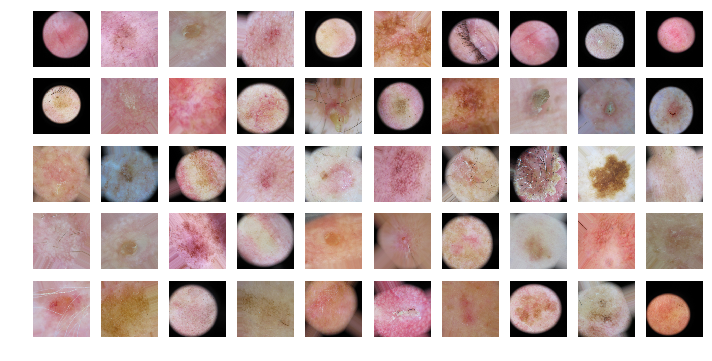

In [23]:
# plots images with labels within jupyter notebook
# source: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

In [0]:
# End of Data Preparation
### ===================================================================================== ###
# Start of Model Building

# Building the model

In [0]:
# Import the libraries
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

from keras import layers
from keras import Model
from keras.models import Sequential
from keras.layers import Activation


from keras.metrics import categorical_crossentropy

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *


%matplotlib inline


## summary on the full model

In [0]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(128, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.GlobalMaxPooling2D()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(8, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

In [27]:
type(model)

keras.engine.training.Model

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 28, 28, 64)        0         
__________

## editing the model

In [0]:
# The paths for the training and validation images
train_path = 'base_dir/train_dir'
val_path = 'base_dir/val_dir'

In [0]:
# Declare a few useful values
num_train_samples = len(df_train)
num_val_samples = val_len
train_batch_size = 100
val_batch_size = 100
image_height = 224
image_width = 224

In [0]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [63]:
# Set up generators

datagenr = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.mobilenet.preprocess_input)


train_batches = datagenr.flow_from_directory(
    train_path,
    target_size=(image_height, image_width),
    batch_size=train_batch_size)

val_batches = datagenr.flow_from_directory(
    val_path,
    target_size=(image_height, image_width),
    batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagenr.flow_from_directory(
    val_path,
    target_size=(image_height, image_width),
    batch_size=val_batch_size,
    shuffle=False)

Found 50534 images belonging to 8 classes.
Found 3396 images belonging to 8 classes.
Found 3396 images belonging to 8 classes.


# Compiling the model

In [0]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

In [0]:
!rm -r models

In [0]:
os.mkdir('models')
import time
start = time.time()

In [68]:
# Declare the filepath for the saved model

#filepath="models/model-{epoch:02d}-{categorical_accuracy:.2f}-{val_categorical_accuracy:.2f}.h5"
filepath="models/base-{epoch:02d}-{val_categorical_accuracy:.2f}.h5"


# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# Reduce the learning rate as the learning stagnates
reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

callbacks_list = [checkpoint, reduce_lr]

# Fit the model
history = model.fit_generator(train_batches,
                              steps_per_epoch=train_steps,
                             # class_weight=class_weights,
                              validation_data=val_batches,
                              validation_steps=val_steps,
                              epochs=30,
                              verbose=1,
                              callbacks=callbacks_list)



Epoch 1/30
203/203 [==============================] - 325s 2s/step - loss: 1.7445 - categorical_accuracy: 0.3316 - val_loss: 1.6363 - val_categorical_accuracy: 0.3657

Epoch 00001: val_categorical_accuracy improved from -inf to 0.36572, saving model to models/base-01-0.37.h5
Epoch 2/30
203/203 [==============================] - 310s 2s/step - loss: 1.6208 - categorical_accuracy: 0.3818 - val_loss: 1.5677 - val_categorical_accuracy: 0.3816

Epoch 00002: val_categorical_accuracy improved from 0.36572 to 0.38163, saving model to models/base-02-0.38.h5
Epoch 3/30
203/203 [==============================] - 311s 2s/step - loss: 1.5184 - categorical_accuracy: 0.4194 - val_loss: 1.5168 - val_categorical_accuracy: 0.4002

Epoch 00003: val_categorical_accuracy improved from 0.38163 to 0.40018, saving model to models/base-03-0.40.h5
Epoch 4/30
203/203 [==============================] - 316s 2s/step - loss: 1.4631 - categorical_accuracy: 0.4395 - val_loss: 1.4487 - val_categorical_accuracy: 0.4317

In [69]:
end = time.time()
elapsed = end - start
print(elapsed)

9488.885201215744


# Model testing and evaluating

In [70]:
val_loss, val_cat_acc = \
model.evaluate_generator(val_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)


val_loss: 1.2906155589050905
val_cat_acc: 0.4820376891550664


In [53]:
# Evaluation of the best epoch
model.load_weights('models/base-27-0.54.h5')


#val_loss, val_cat_acc = \
model.evaluate_generator(val_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)



val_loss: 1.239240858664361
val_cat_acc: 0.5282685470595095


In [71]:
# Create a confusion matrix of the test images
test_labels = val_batches.classes
# Make predictions
predictions = model.predict_generator(val_batches, steps=val_steps, verbose=1)


34/34 [==============================] - 69s 2s/step


**Training and validation loss per epoch curve**

Text(0.5, 1.0, 'Training and validation loss')

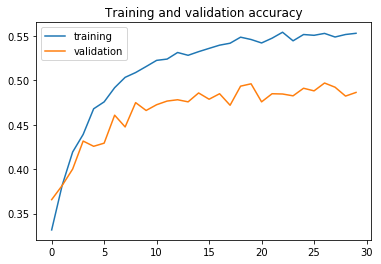

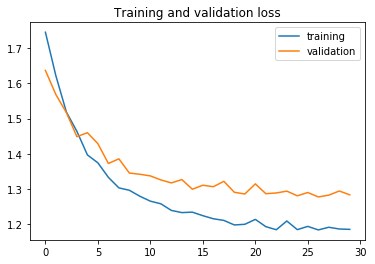

In [72]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

**Confusion matrix**

Confusion matrix, without normalization
[[  9  35  20   2  24  80   1   2]
 [ 29 111  72   7  90 335  11  10]
 [ 19  81  52   7  84 264  10   8]
 [  0  10   5   0   4  27   0   2]
 [ 42 154  98  18 142 420  16  14]
 [ 39 162 113  12 130 418  13  17]
 [  5  21  15   0  15  65   2   3]
 [  2  10   4   0  10  25   0   0]]


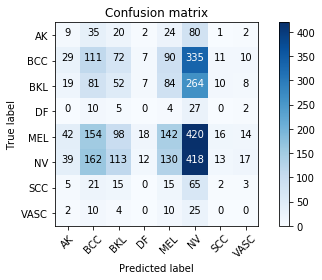

In [73]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['AK' , 'BCC' , 'BKL' , 'DF' , 'MEL' , 'NV' , 'SCC'	, 'VASC']

plot_confusion_matrix(cm, cm_plot_labels)

# Upload the model to drive

In [0]:
!cp 'models/model-30-1.00-0.97.h5' -d 'Densenet-model-0.97.h5'


In [0]:
modelname = 'Densenet-model-0.97.h5'
modelweight = 'Densenet-model-0.97_weightbest.h5'

In [0]:
from keras.models import load_model
from keras.models import Model


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Save Keras Model or weights on google drive




# create on Colab directory
model.save(modelname)    
model_file = drive.CreateFile({'title' : modelname})
model_file.SetContentFile(modelname)
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


In [0]:
model.save_weights(modelweight)
weights_file = drive.CreateFile({'title' : modelweight})
weights_file.SetContentFile(modelweight)
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp '/drive/My\ Drive/densenet89.h5' -d ./

In [0]:
!mv 'Densenet-model-0.97.h5' 'content/drive/My Drive/densenetmodels/Densenet-model-0.97.h5'

In [0]:
os.mkdir('drive/My Drive/densenetmodels')